# Manipulação de Arrays com Numpy

### 4 - Numpy Universal Functions.

#### Uma das vantagens de se usar Numpy é que permite-se aplicar **operações vetorizadas**. 

#### Quando determinadas operações são aplicadas a todos os elementos de um array, essa tarefa pode ser paralelizada e o computador a completa em um tempo muito menor do que se aplicado um loop e operando-se em cada um dos elementos.

#### É para isto que servem as UFuncs (Universal Functions) do Numpy.


#### Exemplo: Calcular o recíproco (1/x) de cada elemento de um array, a partir de um arranjo pré estabelecido. Podemos até cronometrar o tempo da operação, com a função mágica [`%timeit`](https://docs.python.org/2/library/timeit.html#module-timeit).

In [5]:
import numpy as np

In [6]:
big_array = np.random.randint(1, 100, size = 1000000)

#### Abordagem tradicional.

In [7]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

%timeit compute_reciprocals(big_array)

3.08 s ± 1.27 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Abordagem Numpy.

In [8]:
%timeit (1.0 / big_array)

2.53 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 5 - Agregação, Max e Min com Numpy.

#### No Numpy, os métodos que trabalham nos elementos da matriz são implementados de forma mais eficiente:

In [9]:
big_array = np.random.rand(100000)

%timeit sum(big_array)
%timeit np.sum(big_array)

17.6 ms ± 395 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
44.4 µs ± 586 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Um esclarecimento: o np.random nos dá acesso a toda a funcionalidade do módulo random dentro do módulo numpy. 

#### Em arrays de várias dimensões.

In [10]:
M = np.random.random((3, 4))
print(M)

[[0.2461587  0.21738143 0.65632529 0.01012259]
 [0.8573832  0.56347343 0.75199813 0.88302567]
 [0.47000687 0.25528956 0.38907869 0.23289854]]


#### Em Numpy, quando são executadas funções que reduzem a dimensionalidade, axis representa o eixo que será reduzido. Em uma matriz de duas dimensões, o 0 representa o eixo das linhas e 1, o eixo das colunas.

In [11]:
print("Soma de toda a matriz: ", M.sum())
print("Mínimos de cada coluna: ", M.min(axis = 0))
print("Máximo de cada linha: ", M.max(axis = 1))
print("Soma de cada linha: ", M.sum(axis = 1))

Soma de toda a matriz:  5.533142101133194
Mínimos de cada coluna:  [0.2461587  0.21738143 0.38907869 0.01012259]
Máximo de cada linha:  [0.65632529 0.88302567 0.47000687]
Soma de cada linha:  [1.12998801 3.05588043 1.34727366]


#### Exemplo de aplicação de operações vetorizadas.

#### Vamos usar a biblioteca Pandas unicamente para importar um arquivo csv 

In [12]:
import pandas as pd

#### Modificamos o path para acessar o arquivo com os dados.

In [13]:
data = pd.read_csv('president_heights.csv')
data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


#### Indexamos um dataframe de pandas para extrair uma coluna. Mais à frente, estudaremos os dataframes de Pandas detalhadamente. 

In [14]:
c = data['height(cm)']

#### Vejamos os primeiros valores da coluna (tipo Séries em Pandas).

In [15]:
print (type(c))
c.head(5)

<class 'pandas.core.series.Series'>


0    189
1    170
2    189
3    163
4    183
Name: height(cm), dtype: int64

#### Instanciamos um arranjo de Numpy a partir da coluna anterior.

In [16]:
heights = np.array(c)

#### Imprimimos os valores ordenados.

In [17]:
print(np.sort(heights))

[163 168 168 170 170 171 173 173 173 173 174 175 175 177 178 178 178 178
 179 180 182 182 182 182 183 183 183 183 183 183 183 183 185 185 185 188
 188 188 189 189 193 193]


#### Imprimindo os percentis.

In [18]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


#### Importamos as bibliotecas de visualização.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

#### Configuramos parâmetros estéticos por padrão.

In [20]:
seaborn.set()

#### Visualizando o histograma das alturas, configurando os títulos da plotagem e plotando o histograma.

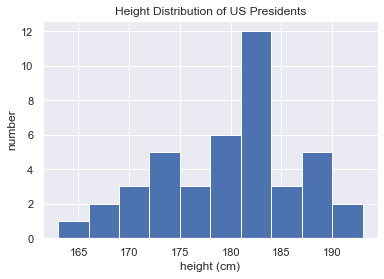

In [21]:
plt.hist(heights)

plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

plt.show()

### 6 - Broadcasting: Outra forma de vetorizar.

#### Em conjunto com as ufuncs, o broadcasting é uma forma de aplicar operações nos dados sem ter que escrever loops ```for``` , que são mais lentos, no Python nativo.

#### Lembrem-se que, quando operamos em arranjos com as mesmas dimensões, operações eficientes podem ser feitas elemento por elemento.

In [22]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

#### No exemplo acima, ```a + b``` é uma operação eficiente porque ```a``` e ```b``` têm a mesma dimensionalidade e tamanho.  As regras de "broadcasting" do Numpy permitem que a operação continue sendo eficiente, levando os elementos envolvidos à mesma dimensão e tamanho.

#### Vejamos o exemplo a seguir:

#### Graficamente temos:

![Broadcasting1.png](Broadcasting1.png)

#### Somando o valor 5 à cada termo do arranjo a:

In [23]:
a + 5

array([5, 6, 7])

#### Vejamos um exemplo com outras dimensões, lembrando dos elementos em a:

In [24]:
a

array([0, 1, 2])

#### Agora queremos somar o vetor ```a``` a uma matriz de duas dimensões, de tamanho 3 x 3 que contém todos valores 1, pra isso usamos o método [`.ones()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html).

In [25]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### Graficamente temos:

![Broadcasting2.png](Broadcasting2.png)

#### Somando os arranjos ```M``` e ```a```.

In [27]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])